In [1]:
# Installiing Libraries
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install plotly==3.10.0
!pip install gerrychain
!pip install maup

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.8MB 277kB/s 
     |████████████████████████████████| 6.5MB 35.1MB/s 
     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=ab6c4c73baf45fa62684767ca9a30e8ad8fdb2c18e9bc7585abaf30ca3549345
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp
     |████████████████████████████████| 41.5MB 107kB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 51kB 1.6MB/s 


In [2]:
# Loading gerrychain library
!git clone https://github.com/mggg/GerryChain.git

Cloning into 'GerryChain'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 6007 (delta 20), reused 23 (delta 10), pack-reused 5965
Receiving objects: 100% (6007/6007), 111.77 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (4094/4094), done.


In [3]:
# loading libraries
import matplotlib.pyplot as plt
import json, math, random, shapely, shapefile, plotly, geopandas
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import seaborn as sns
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
from matplotlib.pyplot import figure
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
plotly.tools.set_credentials_file(username='rahulmnair1997', api_key='OPP7chXNutjkqXw48K52')
from plotly.offline import init_notebook_mode, plot
init_notebook_mode()

In [4]:
path_to_pa = 'GerryChain/docs/user/PA_VTDs.json'

In [5]:
# graph = Graph.from_json(path_to_pa)

In [6]:
# loading data
with open(path_to_pa) as f:
    data = json.load(f)
cd_df = pd.DataFrame(data['nodes'])
cd_df

,boundary_node,boundary_perim,area,STATEFP10,COUNTYFP10,VTDST10,GEOID10,VTDI10,NAME10,NAMELSAD10,LSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,H_WHITE,H_BLACK,H_AMIN,H_ASIAN,H_NHPI,H_OTHER,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,ATG12D,ATG12R,F2014GOVD,F2014GOVR,GOV10D,GOV10R,PRES12D,PRES12O,PRES12R,SEN10D,SEN10R,T16ATGD,T16ATGR,T16PRESD,T16PRESOTH,T16PRESR,T16SEND,T16SENR,USS12D,USS12R,REMEDIAL,GOV,TS,CD_2011,SEND,HDIST,538DEM,538GOP,538CMPCT,id
0,True,0.063126,0.004278,42,085,960,42085960,A,SHENANGO TWP VTD WEST,SHENANGO TWP VTD WEST,00,G5240,N,39740056,141805,+41.1564874,-080.4865792,1915,1839,35,1,8,0,3,19,10,3,0,1,0,0,4,2,1553,7,1494,30,1,6,0,2,13,514.000104,388.000078,290.000058,242.000049,289.000058,349.000070,492.000099,11.000002,451.000091,315.000063,328.000066,416.000084,558.000112,342.000069,32.000006,631.000127,379.000076,590.000119,505.000102,423.000085,16,3,3,3,50,7,03,03,03,0
1,False,NaN,0.000551,42,039,40,4203940,A,BLOOMING VALLEY Voting District,BLOOMING VALLEY Voting District,00,G5240,N,5034196,57763,+41.6745788,-080.0382865,337,334,1,0,0,0,0,1,1,1,0,0,0,0,0,0,257,1,254,1,0,0,0,0,1,56.999999,123.999997,44.999999,96.999998,27.999999,124.999997,50.999999,10.000000,126.999997,34.999999,115.999998,39.999999,130.999997,32.999999,8.000000,133.999997,35.999999,125.999997,44.999999,135.999997,16,3,5,3,50,6,03,03,03,1
2,False,NaN,0.007934,42,039,10,4203910,A,ATHENS TWP Voting District,ATHENS TWP Voting District,00,G5240,N,73207387,91606,+41.7499682,-079.8467004,734,719,4,4,0,0,0,2,5,5,0,0,0,0,0,0,586,3,578,1,3,0,0,0,1,67.999996,214.999986,47.999997,155.999990,41.999997,200.999987,74.999995,6.000000,224.999985,51.999997,192.999987,52.999997,266.999983,49.999997,8.999999,273.999982,54.999996,260.999983,64.999996,229.999985,16,3,5,3,50,65,03,03,03,2
3,True,0.091923,0.010283,42,039,20,4203920,A,BEAVER TWP Voting District,BEAVER TWP Voting District,00,G5240,N,94916802,2059,+41.8099591,-080.4562835,902,881,7,0,0,0,0,11,3,2,0,0,0,0,1,0,656,0,645,4,0,0,0,0,7,111.000001,153.000001,66.000000,102.000000,66.000000,139.000001,110.000001,6.000000,167.000001,76.000000,134.000001,89.000000,203.000001,74.000000,13.000000,214.000001,75.000000,204.000001,112.000001,160.000001,16,3,3,3,50,17,03,03,03,3
4,False,NaN,0.010732,42,039,30,4203930,A,BLOOMFIELD TWP Voting District,BLOOMFIELD TWP Voting District,00,G5240,N,98195373,847815,+41.8113731,-079.8363351,1919,1877,7,1,2,1,0,16,15,10,0,0,0,0,1,4,1470,7,1450,2,1,2,0,0,8,329.999982,341.999981,225.999988,230.999987,177.999990,363.999980,314.999983,15.999999,393.999979,196.999989,339.999982,263.999986,528.999971,227.999988,29.999998,555.999970,246.999987,511.999972,267.999985,435.999976,16,3,5,3,50,65,03,03,03,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9250,False,NaN,0.002479,42,001,100,42001100,A,CONEWAGO TWP VTD 02,CONEWAGO TWP VTD 02,00,G5240,N,23415287,157872,+39.7934562,-077.0339760,4276,4042,51,4,49,0,5,47,78,41,0,0,4,0,31,2,3096,40,2971,35,0,30,0,1,19,676.791329,945.105052,437.511555,675.790159,308.360546,936.094516,550.643833,27.031606,1108.295860,358.419077,876.024280,467.546673,1074.256060,415.485801,65.076089,1098.284154,435.509213,1064.244354,589.689487,1052.230306,13,4,4,4,33,91,09,04,04,9250
9251,True,0.044005,0.004784,42,001,480,42001480,A,UNION TWP,UNION TWP Voting District,V2,G5240,N,45438462,82892,+39.7558798,-077.0498477,3148,2996,20,4,23,0,2,36,67,57,0,0,0,0,6,4,2404,34,2320,11,4,15,0,1,19,440.999993,855.999987,246.999996,588.999991,185.999997,832.999988,351.999995,24.000000,982.999985,217.999997,796.999988,347.999995,1122.999983,310.999995,62.999999,1154.999983,339.999995,1080.999984,364.999995,964.999986,

# Congressional Districts for 2012

In [7]:
geo_df_12 = geopandas.read_file('/content/BlockLevelFinalCongressionalPlan21Dec2011.shp')
geo_df_12 = geo_df_12.rename(columns={'SHAPE_Area': 'Shape_Area', 'SHAPE_Leng': 'Shape_Leng'})

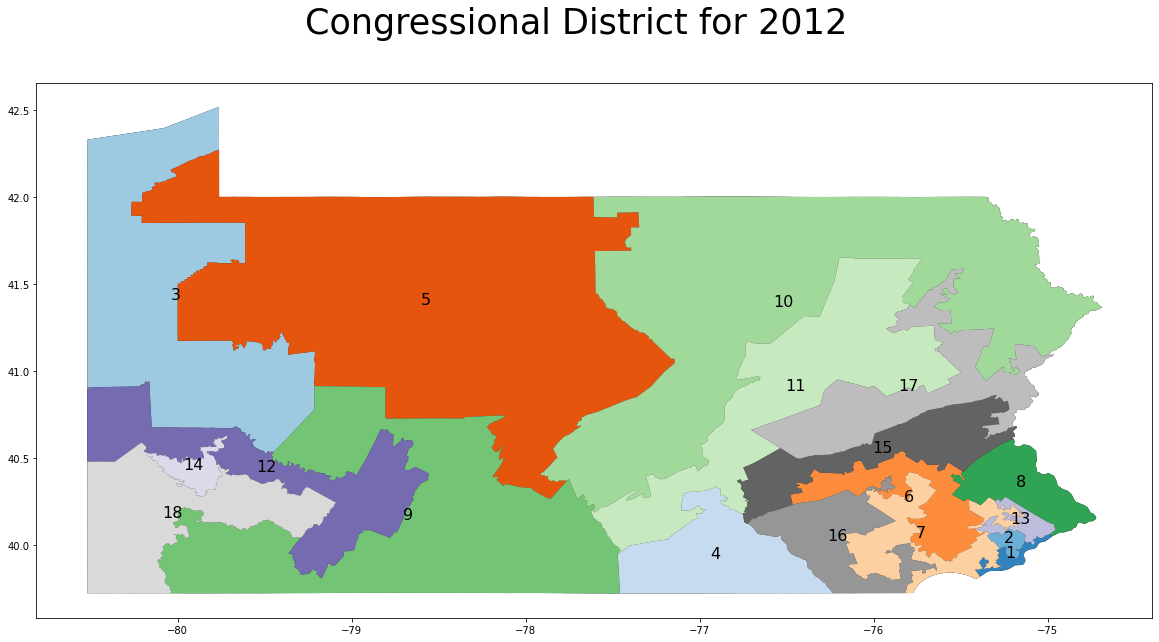

In [33]:
fig = plt.figure(1, figsize=(20,10)) 
ax = fig.add_subplot()
fig.suptitle('Congressional District for 2012', fontsize=35)
geo_df_12.apply(lambda x: ax.annotate(s=x.District_N, xy=x.geometry.centroid.coords[0], ha='center', fontsize=16),axis=1)
geo_df_12.plot(ax=ax, color='Black', linewidth=1)
geo_df_12.plot(ax=ax, cmap='tab20c')
plt.show()

In [35]:
district_12 = cd_df.groupby('CD_2011').sum().reset_index().rename(columns = {'CD_2011': 'District_N'})

In [36]:
district_12['District_N'] = district_12['District_N'].apply(str)

In [37]:
district = pd.merge(geo_df_12, district_12, on='District_N', how='left')

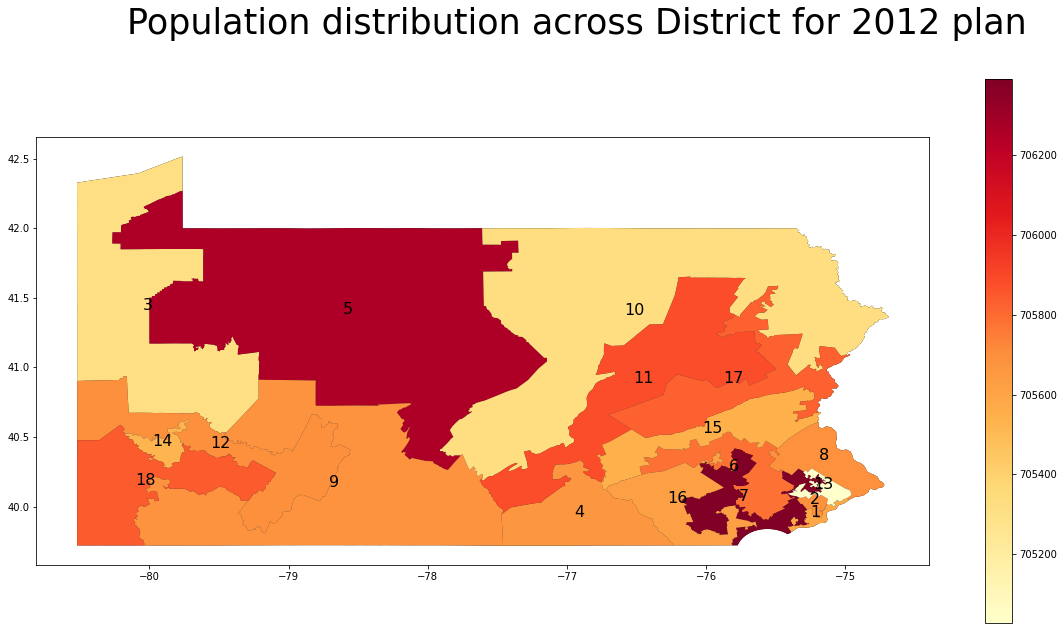

In [38]:
fig = plt.figure(1, figsize=(20,10)) 
ax = fig.add_subplot()
fig.suptitle('Population distribution across District for 2012 plan', fontsize=35)
district.apply(lambda x: ax.annotate(s=x.District_N, xy=x.geometry.centroid.coords[0], ha='center', fontsize=16),axis=1)
district.plot(ax=ax, color='Black', linewidth=1)
district.plot(column='TOTPOP',cmap='YlOrRd', legend=True, ax=ax)

In [46]:
d = district_12[['NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN','NH_NHPI', 
                  'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK','H_AMIN', 'H_ASIAN', 'H_NHPI']]

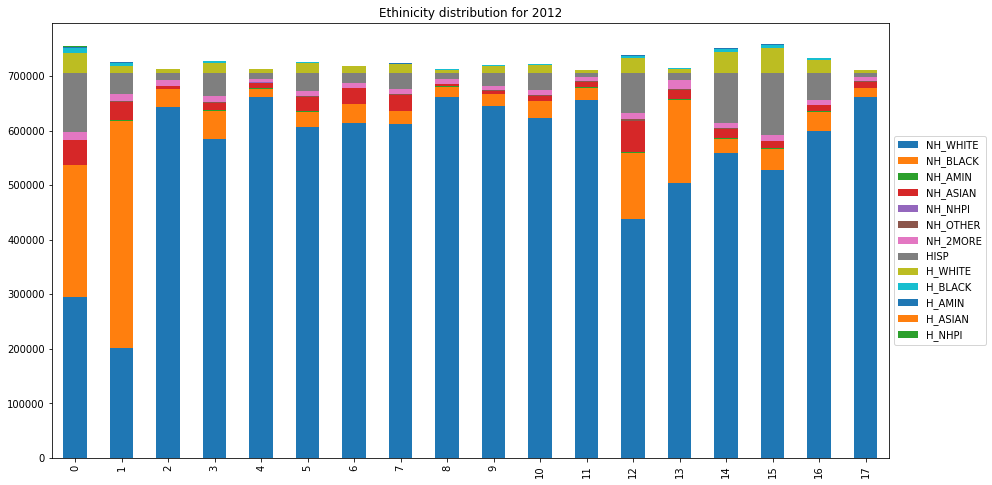

In [50]:
d.plot(kind='bar', stacked=True, figsize=(15,8), title='Ethinicity distribution for 2012').legend(loc='center left',
                                                                                                      bbox_to_anchor=(1.0, 0.5))

# Congressional Districts for 2018

In [39]:
geo_df_18 = geopandas.read_file('/content/PaCongressional2020_08.shp')

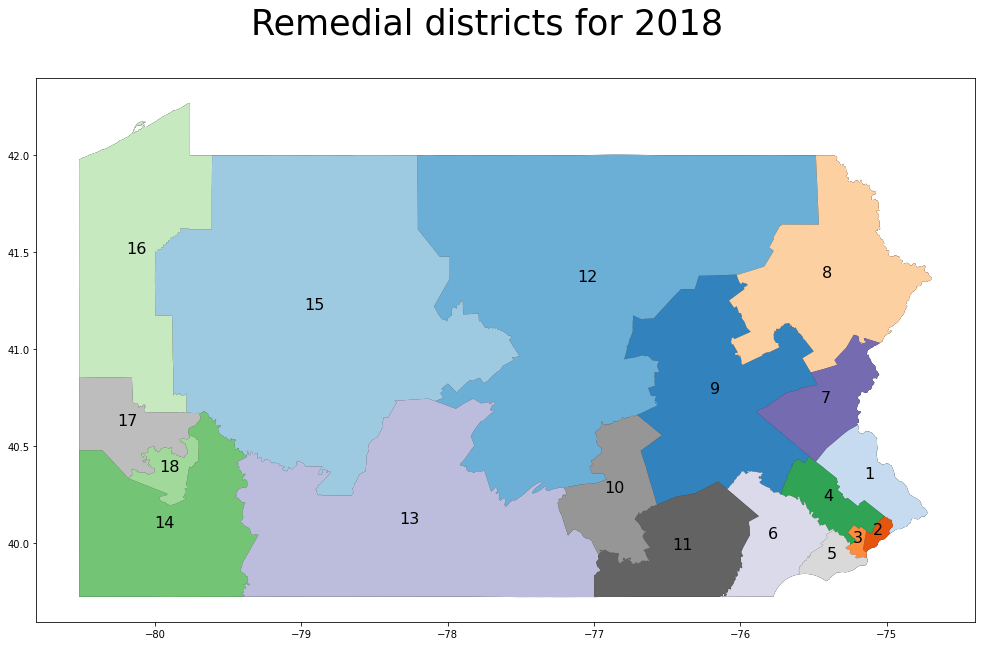

In [41]:
fig = plt.figure(1, figsize=(20,10)) 
ax = fig.add_subplot()
fig.suptitle('Remedial districts for 2018', fontsize=35)
geo_df_18.apply(lambda x: ax.annotate(s=x.LEG_DISTRI, xy=x.geometry.centroid.coords[0], ha='center', fontsize=16),axis=1)
geo_df_18.plot(ax=ax, color='Black', linewidth=1)
geo_df_18.plot(ax=ax, cmap='tab20c')
plt.show()

In [42]:
district_18 = cd_df.groupby('REMEDIAL').sum().reset_index().rename(columns = {'REMEDIAL': 'LEG_DISTRI'})

In [43]:
district_18['LEG_DISTRI'] = district_18['LEG_DISTRI'].apply(int)

In [44]:
district = pd.merge(geo_df_18, district_18, on='LEG_DISTRI', how='left')

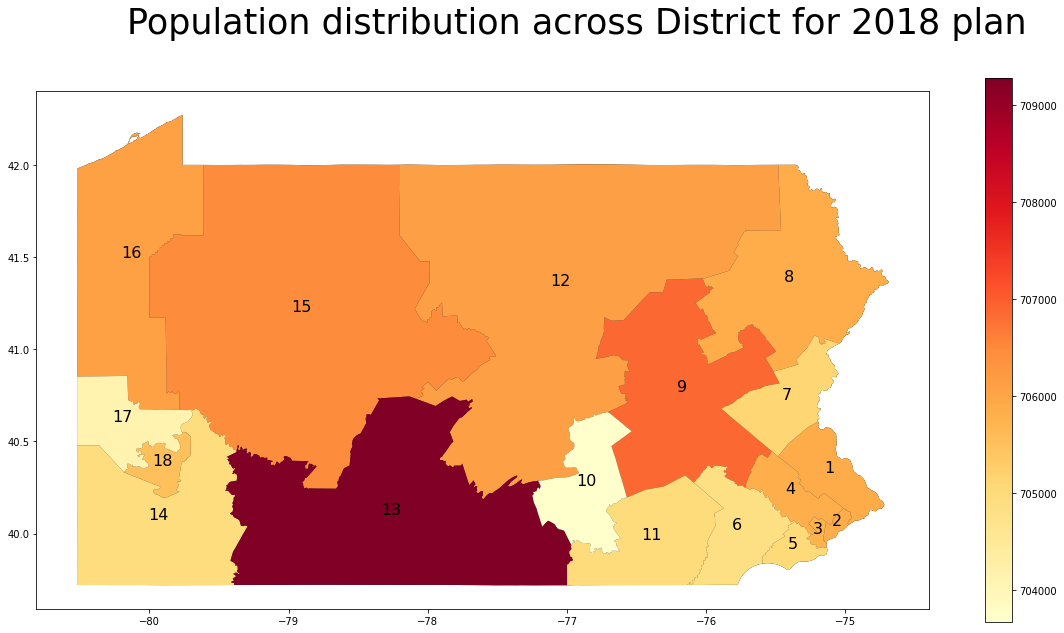

In [45]:
fig = plt.figure(1, figsize=(20,10)) 
ax = fig.add_subplot()
fig.suptitle('Population distribution across District for 2018 plan', fontsize=35)
district.apply(lambda x: ax.annotate(s=x.LEG_DISTRI, xy=x.geometry.centroid.coords[0], ha='center', fontsize=16),axis=1)
district.plot(ax=ax, color='Black', linewidth=1)
district.plot(column='TOTPOP',cmap='YlOrRd', legend=True, ax=ax)

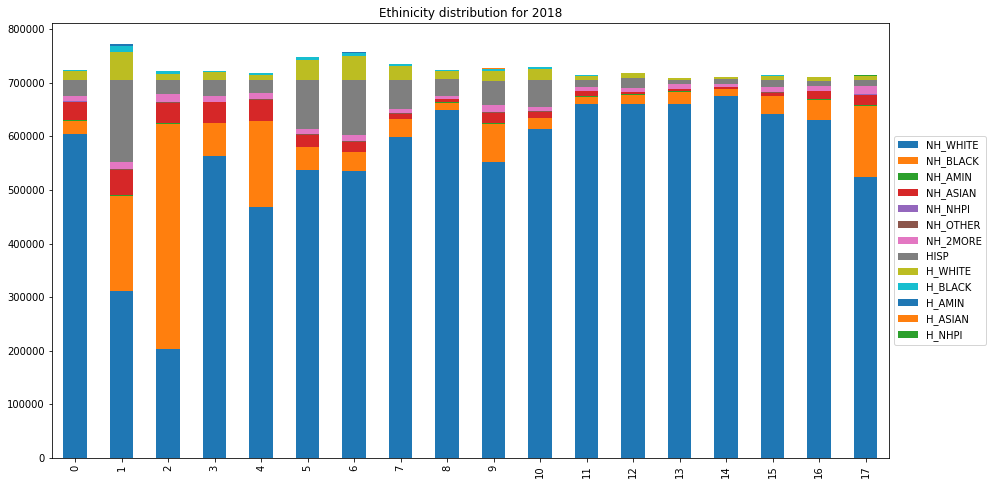

In [52]:
d = district_18[['NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN','NH_NHPI', 
                  'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK','H_AMIN', 'H_ASIAN', 'H_NHPI']]
d.plot(kind='bar', stacked=True, figsize=(15,8), title='Ethinicity distribution for 2018').legend(loc='center left',
                                                                                                      bbox_to_anchor=(1.0, 0.5))

# Calculating Compactness scores for 2012 and 2018 congressional districts

In [ ]:
# Calculating Polsby-Popper compactness metric
def polsby(df):
  return ((4*np.pi*df.Shape_Area)/((df.Shape_Leng)**2)) *100

# Calculating Schwartzberg compactness metric
def schwartz(df):
  return (1/(df.Shape_Leng/(2*math.sqrt(np.pi*df.Shape_Area))))*100

def convex_hull_area(df):
  points = list(zip(*df.geometry.exterior.coords.xy))
  hull = ConvexHull(points)
  return hull.area

def area_by_convex_hull(df):
  return (df.Shape_Area/df.convex_hull_area)*100

In [ ]:
# Using code from https://www.nayuki.io/page/smallest-enclosing-circle
# This cell is used to calculate the area of minimum circle formed with the boundaries.

def make_circle(df):
	# Convert to float and randomize order
  points = list(zip(*df.geometry.exterior.coords.xy))
  shuffled = [(float(x), float(y)) for (x, y) in points]
  random.shuffle(shuffled)
	
	# Progressively add points to circle or recompute circle
  c = None
  for (i, p) in enumerate(shuffled):
    if c is None or not is_in_circle(c, p):
      c = _make_circle_one_point(shuffled[ : i + 1], p)
  return c


# One boundary point known
def _make_circle_one_point(points, p):
  c = (p[0], p[1], 0.0)
  for (i, q) in enumerate(points):
    if not is_in_circle(c, q):
      if c[2] == 0.0:
        c = make_diameter(p, q)
      else:
        c = _make_circle_two_points(points[ : i + 1], p, q)
  return c


# Two boundary points known
def _make_circle_two_points(points, p, q):
	circ = make_diameter(p, q)
	left  = None
	right = None
	px, py = p
	qx, qy = q
	
	# For each point not in the two-point circle
	for r in points:
		if is_in_circle(circ, r):
			continue
		
		# Form a circumcircle and classify it on left or right side
		cross = _cross_product(px, py, qx, qy, r[0], r[1])
		c = make_circumcircle(p, q, r)
		if c is None:
			continue
		elif cross > 0.0 and (left is None or _cross_product(px, py, qx, qy, c[0], c[1]) > _cross_product(px, py, qx, qy, left[0], left[1])):
			left = c
		elif cross < 0.0 and (right is None or _cross_product(px, py, qx, qy, c[0], c[1]) < _cross_product(px, py, qx, qy, right[0], right[1])):
			right = c
	
	# Select which circle to return
	if left is None and right is None:
		return circ
	elif left is None:
		return right
	elif right is None:
		return left
	else:
		return left if (left[2] <= right[2]) else right


def make_diameter(a, b):
	cx = (a[0] + b[0]) / 2
	cy = (a[1] + b[1]) / 2
	r0 = math.hypot(cx - a[0], cy - a[1])
	r1 = math.hypot(cx - b[0], cy - b[1])
	return (cx, cy, max(r0, r1))


def make_circumcircle(a, b, c):
	# Mathematical algorithm from Wikipedia: Circumscribed circle
	ox = (min(a[0], b[0], c[0]) + max(a[0], b[0], c[0])) / 2
	oy = (min(a[1], b[1], c[1]) + max(a[1], b[1], c[1])) / 2
	ax = a[0] - ox;  ay = a[1] - oy
	bx = b[0] - ox;  by = b[1] - oy
	cx = c[0] - ox;  cy = c[1] - oy
	d = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by)) * 2.0
	if d == 0.0:
		return None
	x = ox + ((ax*ax + ay*ay) * (by - cy) + (bx*bx + by*by) * (cy - ay) + (cx*cx + cy*cy) * (ay - by)) / d
	y = oy + ((ax*ax + ay*ay) * (cx - bx) + (bx*bx + by*by) * (ax - cx) + (cx*cx + cy*cy) * (bx - ax)) / d
	ra = math.hypot(x - a[0], y - a[1])
	rb = math.hypot(x - b[0], y - b[1])
	rc = math.hypot(x - c[0], y - c[1])
	return (x, y, max(ra, rb, rc))
 

_MULTIPLICATIVE_EPSILON = 1 + 1e-14


def is_in_circle(c, p):
	return c is not None and math.hypot(p[0] - c[0], p[1] - c[1]) <= c[2] * _MULTIPLICATIVE_EPSILON


# Returns twice the signed area of the triangle defined by (x0, y0), (x1, y1), (x2, y2).
def _cross_product(x0, y0, x1, y1, x2, y2):
	return (x1 - x0) * (y2 - y0) - (y1 - y0) * (x2 - x0)
 

# Calculate Area/Minimum_Bounded_Circle
def area_by_circle_area(df):
  return df.Shape_Area/df.circle_area

In [86]:
# For 2018
geo_df_18['polsby'] = geo_df_18.apply(lambda x: polsby(x), axis=1)
geo_df_18['schwartz'] = geo_df_18.apply(lambda x: schwartz(x), axis=1)
geo_df_18['convex_hull_area'] = geo_df_18.apply(lambda x: convex_hull_area(x), axis=1)
geo_df_18['convex_hull_area'] *= 10**10
geo_df_18['area/convex_hull'] = geo_df_18.apply(lambda x: area_by_convex_hull(x), axis=1)
geo_df_18['circle'] = geo_df_18.apply(lambda x: make_circle(x), axis=1)
geo_df_18['circle_area'] = [k for i,j,k in geo_df_18.circle] 
geo_df_18['circle_area'] *= 10**9
geo_df_18['area/circle_area'] = geo_df_18.apply(lambda x: area_by_circle_area(x), axis=1)

In [ ]:
# For 2012
geo_df_12 = geo_df_12.rename(columns={'Compactnes': 'polsby'})
geo_df_12['schwartz'] = geo_df_12.apply(lambda x: schwartz(x), axis=1)
geo_df_12['convex_hull_area'] = geo_df_12.apply(lambda x: convex_hull_area(x), axis=1)
geo_df_12['area/convex_hull'] = geo_df_12.apply(lambda x: area_by_convex_hull(x), axis=1)
geo_df_12['circle'] = geo_df_12.apply(lambda x: make_circle(x), axis=1)
geo_df_12['circle_area'] = [k for i,j,k in geo_df_12.circle] 
geo_df_12['area/circle_area'] = geo_df_12.apply(lambda x: area_by_circle_area(x), axis=1)
geo_df_12['area/circle_area'] *= 10

In [ ]:
print('Average value of Polsby-Popper compactness metric in 2018 congressional district', np.mean(geo_df_18['polsby']))
print('Average value of Schwartzberg compactness metric in 2018 congressional district', np.mean(geo_df_18['schwartz']))
print('Average value of Area/Convex_Hull compactness metric in 2018 congressional district', np.mean(geo_df_18['area/convex_hull']))
print('Average value of Area/Minimum_bounded_circle metric in 2018 congressional district', np.mean(geo_df_18['area/circle_area']))

Average value of Polsby-Popper compactness metric in 2018 congressional district 33.27055634845176
Average value of Schwartzberg compactness metric in 2018 congressional district 57.321484620518355
Average value of Area/Convex_Hull compactness metric in 2018 congressional district 25.57101919825051
Average value of Area/Minimum_bounded_circle metric in 2018 congressional district 13.432640923762605


In [ ]:
print('Average value of Polsby-Popper compactness metric in 2012 congressional district', np.mean(geo_df_12['polsby']))
print('Average value of Schwartzberg compactness metric in 2012 congressional district', np.mean(geo_df_12['schwartz']))
print('Average value of Area/Convex_Hull compactness metric in 2012 congressional district', np.mean(geo_df_12['area/convex_hull']))
print('Average value of Area/Minimum_bounded_circle metric in 2012 congressional district', np.mean(geo_df_12['area/circle_area']))

Average value of Polsby-Popper compactness metric in 2012 congressional district 16.37916929350833
Average value of Schwartzberg compactness metric in 2012 congressional district 38.62666670026667
Average value of Area/Convex_Hull compactness metric in 2012 congressional district 13.437153208642627
Average value of Area/Minimum_bounded_circle metric in 2012 congressional district 6.65156211178188


## Compactness Metric Heatmap for 2012 Congressional District

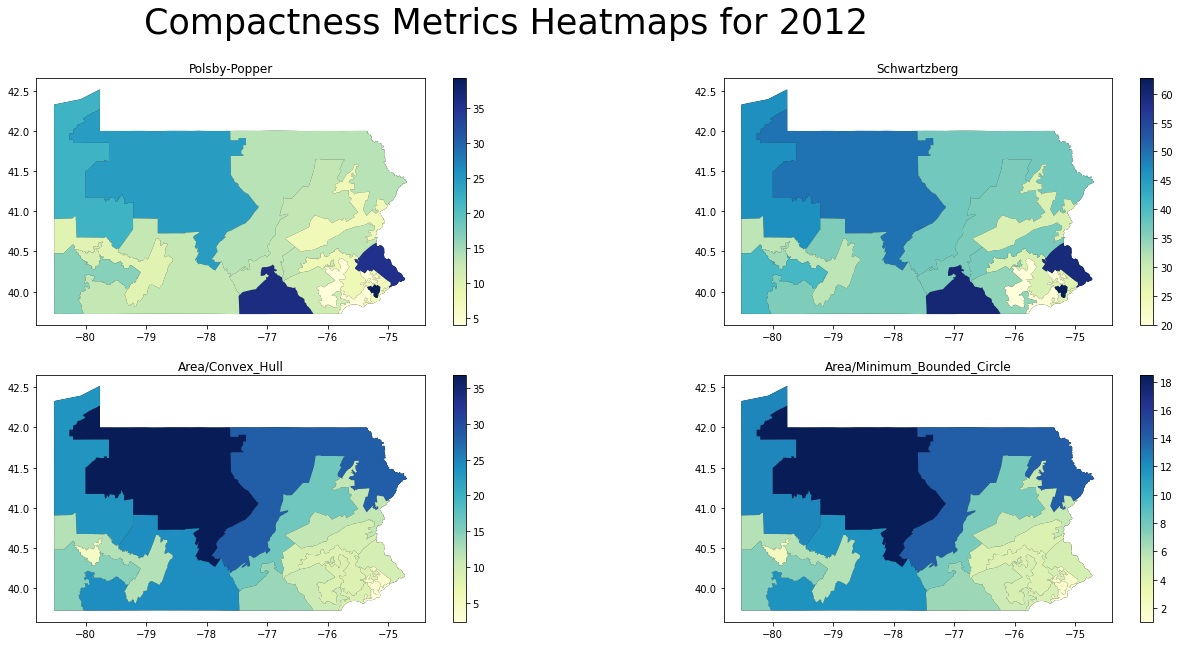

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(right=1)
axs[0,0].set_title("Polsby-Popper")
axs[0,1].set_title("Schwartzberg")
axs[1,0].set_title("Area/Convex_Hull")
axs[1,1].set_title("Area/Minimum_Bounded_Circle")
fig.suptitle('Compactness Metrics Heatmaps for 2012', fontsize=35)
geo_df_12.plot(ax=axs[0,0], color='Black', linewidth=.1)
geo_df_12.plot(column='polsby',cmap='YlGnBu', legend=True, ax=axs[0,0])
geo_df_12.plot(ax=axs[0,1], color='Black', linewidth=1)
geo_df_12.plot(column='schwartz',cmap='YlGnBu', legend=True, ax=axs[0,1])
geo_df_12.plot(ax=axs[1,0], color='Black', linewidth=1)
geo_df_12.plot(column='area/convex_hull', cmap='YlGnBu', legend=True, ax=axs[1,0])
geo_df_12.plot(ax=axs[1,1], color='Black', linewidth=1)
geo_df_12.plot(column='area/circle_area', cmap='YlGnBu', legend=True, ax=axs[1,1])
plt.show()


## Compactness Metric Heatmap for 2018 Congressional District

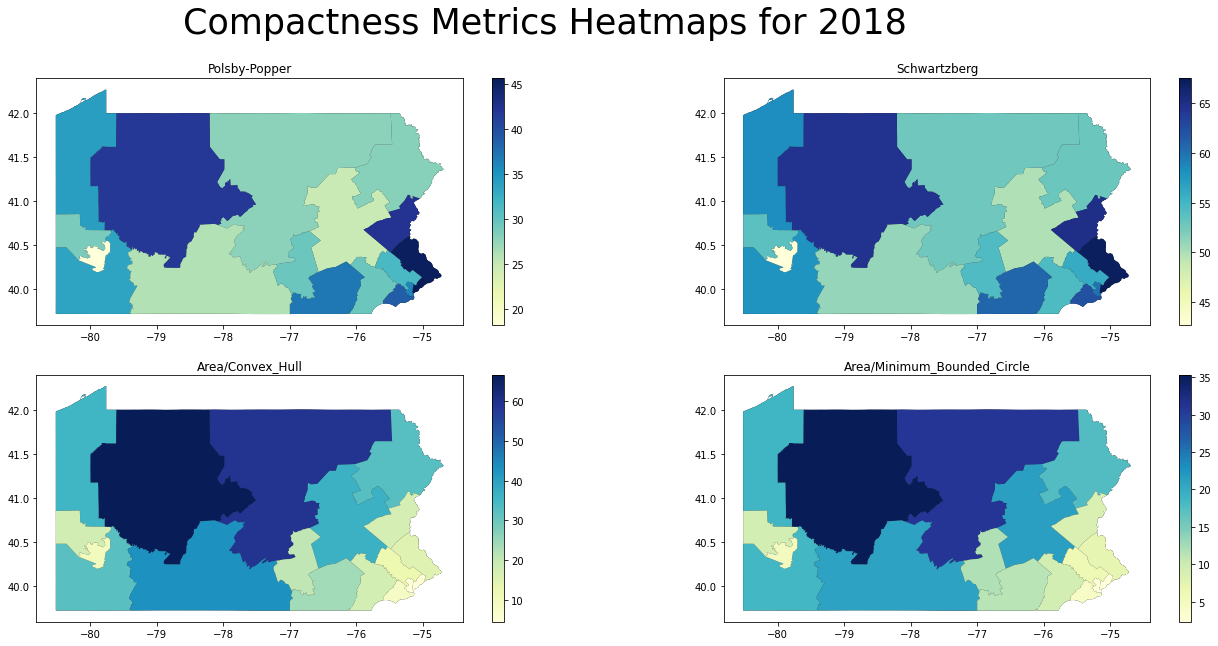

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(right=1)
axs[0,0].set_title("Polsby-Popper")
axs[0,1].set_title("Schwartzberg")
axs[1,0].set_title("Area/Convex_Hull")
axs[1,1].set_title("Area/Minimum_Bounded_Circle")
fig.suptitle('Compactness Metrics Heatmaps for 2018', fontsize=35)
geo_df_18.plot(ax=axs[0,0], color='Black', linewidth=1)
geo_df_18.plot(column='polsby',cmap='YlGnBu', legend=True, ax=axs[0,0])
geo_df_18.plot(ax=axs[0,1], color='Black', linewidth=1)
geo_df_18.plot(column='schwartz',cmap='YlGnBu', legend=True, ax=axs[0,1])
geo_df_18.plot(ax=axs[1,0], color='Black', linewidth=1)
geo_df_18.plot(column='area/convex_hull', cmap='YlGnBu', legend=True, ax=axs[1,0])
geo_df_18.plot(ax=axs[1,1], color='Black', linewidth=1)
geo_df_18.plot(column='area/circle_area', cmap='YlGnBu', legend=True, ax=axs[1,1])
plt.show()